## About Dataset
### Context

This dataset includes A/B test results of Cookie Cats to examine what happens when the first gate in the game was moved from level 30 to level 40. When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40.

### Content

The data we have is from 90,189 players that installed the game while the AB-test was running. The variables are:

* userid: A unique number that identifies each player.
* version: Whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a gate at level 40).
* sum_gamerounds: the number of game rounds played by the player during the first 14 days after install.
* retention_1: Did the player come back and play 1 day after installing?
* retention_7: Did the player come back and play 7 days after installing?

When a player installed the game, he or she was randomly assigned to either.

#### Link: https://www.kaggle.com/datasets/mursideyarkin/mobile-games-ab-testing-cookie-cats

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

from statsmodels.stats.proportion import proportions_ztest

In [2]:
data = pd.read_csv('cookie_cats.csv')

In [3]:
df = data.copy()
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
df.isna().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [5]:
df.dtypes

userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

In [6]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [7]:
df.duplicated().sum()

0

In [8]:
cols = list(df.columns)

for col in cols:
    print(f'Unique values in {col} column: {df[col].nunique()}')

Unique values in userid column: 90189
Unique values in version column: 2
Unique values in sum_gamerounds column: 942
Unique values in retention_1 column: 2
Unique values in retention_7 column: 2


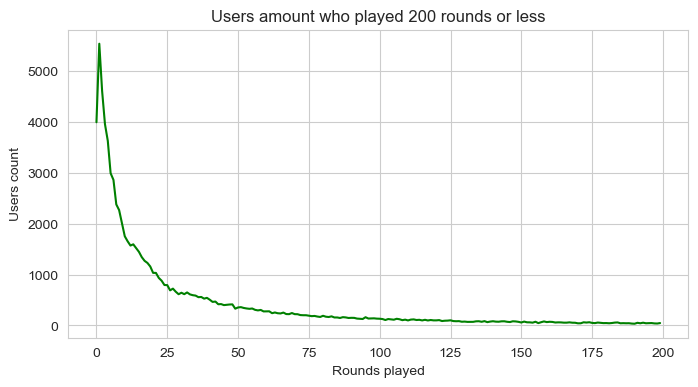

In [9]:
plt.figure(figsize = (8,4))
df.groupby('sum_gamerounds')['userid'].count().head(200).plot(color = 'green')
plt.title('Users amount who played 200 rounds or less')
plt.xlabel('Rounds played')
plt.ylabel('Users count')
plt.show()

In [10]:
null_rounds = df[df['sum_gamerounds']==0]['userid'].count()
print(f'{null_rounds} users never played after installing.')

3994 users never played after installing.


In [11]:
vc = df.version.value_counts()
print(f'{vc.gate_40} players had version gate_40')
print(f'{vc.gate_30} players had version gate_30')
print('Groups are almost balanced.')

45489 players had version gate_40
44700 players had version gate_30
Groups are almost balanced.


In [12]:
ret_1 = df['retention_1'].sum() / df['retention_1'].count() * 100
print(f'{ret_1.round(2)}% players came back and played 1 day after installing.')

44.52% players came back and played 1 day after installing.


In [13]:
ret_7 = df['retention_7'].sum() / df['retention_7'].count() * 100
print(f'{ret_7.round(2)}% players came back and played 7 day after installing.')

18.61% players came back and played 7 day after installing.


### AB testing - two groups comparison

H0 : p1 = p2

H0 : There is no statistically significant difference between gate_30 players and  gate_40 players. (based on 1 day player retention)

H1 : p1 ! = p2

H1 : There is a statistically significant difference between gate_30 players and gate_40 players. (based on 1 day player retention)

In the video game industry; There is a criterion that the game is downloaded and "if it comes back after 1 day and 7 days, the higher the percentage of players playing the game is, the more fun and interesting the game".

### Testing on 1-day retention

In [14]:
df.groupby('version')['retention_1'].sum()

version
gate_30    20034
gate_40    20119
Name: retention_1, dtype: int64

In [15]:
n_success = np.array([20034, 20119])
n_observations = np.array([44700, 45489])
z_stat, p_value = proportions_ztest(count=n_success, nobs=n_observations)
print(f'Z-test statistic: {z_stat.round(3)}')
print(f'p-value: {p_value.round(3)}')

Z-test statistic: 1.784
p-value: 0.074


* H0 cannot be rejected according to retention-1 because p-value = 0.074 > 0.05.

There is NO statistically significant difference between gate_30 players and gate_40 players. (based on 1 day player retention retention)

### Testing on 7-days retention

In [16]:
n_success = np.array([8502, 8279])
n_observations = np.array([44700, 45489])
z_stat, p_value = proportions_ztest(count=n_success, nobs=n_observations)
print(f'Z-test statistic: {z_stat.round(3)}')
print(f'p-value: {p_value.round(3)}')

Z-test statistic: 3.164
p-value: 0.002


* H0 is REJECTED according to retention-7 because p-value = 0.001 < 0.05.

There is a statistically significant difference between gate_30 players and gate_40. (based on 7-day player retention retention)

In [17]:
g30s, g40s = n_success/n_observations
print(f'gate_30 version success rate: {g30s.round(2)}')
print(f'gate_40 version success rate: {g40s.round(2)}')

gate_30 version success rate: 0.19
gate_40 version success rate: 0.18


### Conclusion:
There is no significant difference between these two versions.